# Wine Quality Prediction using LinearRegression

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/aswin/Desktop/winequality-red.csv')
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values



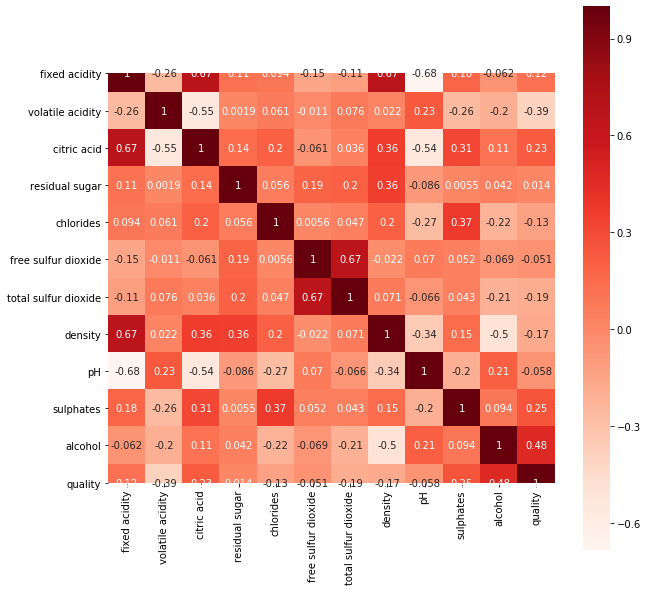

In [3]:
correlation=df.corr()
fig=plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True, annot=True,cmap='Reds')

Define a function get_features()which outputs only those features whose correlation is above a threshold value

In [4]:
def get_features(correlation_threshold):
    abs_corrs = correlation.abs()
    high_correlations= abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

taking features with correlation more than 0.05 as input x and quality as target variable y 

In [5]:
features=get_features(0.05)
print(features)
x=df[features]
y=df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


Training the dataset to the model

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

fitting linear regression to training data

In [7]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.coef_)


[-1.24588351e-16  4.41926721e-16  2.03309610e-15  4.50491507e-16
 -8.24260591e-17  1.70092403e-16 -6.18724919e-17 -7.74545728e-14
  6.46238085e-16 -2.63290050e-16 -2.02410986e-16  1.00000000e+00]


To predict the quality of wine with this model, use predict().

In [8]:
train_pred=regressor.predict(x_train)
print(train_pred)
test_pred =regressor.predict(x_test)
print(test_pred)

[5. 5. 6. ... 6. 7. 5.]
[5. 4. 6. 7. 4. 6. 4. 8. 5. 5. 6. 5. 5. 5. 7. 5. 6. 5. 7. 6. 6. 5. 6. 5.
 5. 5. 5. 6. 5. 6. 5. 6. 5. 7. 5. 5. 6. 5. 5. 7. 4. 5. 7. 6. 5. 7. 6. 5.
 6. 5. 5. 6. 6. 6. 5. 5. 5. 5. 5. 4. 5. 6. 6. 5. 6. 6. 6. 6. 5. 6. 5. 5.
 6. 5. 6. 6. 6. 6. 6. 6. 6. 5. 5. 6. 5. 6. 5. 5. 6. 6. 6. 6. 7. 5. 5. 6.
 5. 5. 5. 6. 6. 4. 6. 6. 6. 5. 4. 5. 6. 7. 6. 5. 6. 6. 5. 5. 6. 5. 6. 4.
 6. 5. 6. 5. 6. 6. 6. 6. 6. 5. 5. 6. 6. 6. 7. 5. 7. 6. 6. 6. 5. 7. 5. 5.
 6. 5. 5. 5. 7. 5. 4. 6. 6. 5. 5. 6. 6. 6. 5. 4. 5. 6. 6. 6. 5. 6. 5. 6.
 5. 6. 7. 7. 5. 6. 6. 5. 5. 5. 6. 7. 7. 6. 6. 6. 5. 6. 6. 6. 7. 5. 6. 7.
 5. 6. 6. 5. 5. 6. 6. 5. 5. 5. 7. 6. 5. 5. 5. 7. 5. 6. 6. 6. 5. 6. 7. 7.
 5. 5. 5. 3. 5. 5. 5. 4. 6. 6. 7. 5. 6. 6. 6. 5. 5. 6. 5. 5. 5. 7. 4. 5.
 6. 6. 6. 5. 7. 7. 6. 5. 5. 6. 5. 5. 6. 6. 5. 6. 7. 3. 5. 5. 7. 6. 6. 6.
 5. 7. 6. 5. 5. 5. 6. 6. 6. 6. 7. 5. 5. 5. 5. 5. 7. 5. 6. 6. 5. 6. 5. 5.
 6. 5. 5. 7. 6. 5. 5. 6. 5. 7. 6. 7. 5. 7. 6. 5. 6. 5. 6. 6. 5. 5. 6. 5.
 6. 6. 5. 5. 5. 6. 5. 5. 7.

Calculating Root mean squared error

In [9]:

train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
train_rmse


NameError: name 'mean_squared_error' is not defined

In [15]:
test_rmse=(mean_squared_error(test_pred, y_test) ** 0.5)
test_rmse

1.7188030981042271e-15

In [17]:
train_rmse=(mean_squared_error(train_pred, y_train) ** 0.5)
train_rmse

1.6005699437620101e-15

rounding off the predicted values for test set

In [ ]:
predicted_data=np.round(test_pred)
print(predicted_data)

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 1.0769163338864018e-15
Mean Squared Error: 2.9542840900526893e-30
Root Mean Squared Error: 1.7188030981042271e-15


In [22]:
coeffecients = pd.DataFrame(regressor.coef_,features) 
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

                       Coeffecient
fixed acidity        -1.245884e-16
volatile acidity      4.419267e-16
citric acid           2.033096e-15
residual sugar        4.504915e-16
chlorides            -8.242606e-17
free sulfur dioxide   1.700924e-16
total sulfur dioxide -6.187249e-17
density              -7.745457e-14
pH                    6.462381e-16
sulphates            -2.632900e-16
alcohol              -2.024110e-16
quality               1.000000e+00
